In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import japanize_matplotlib
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [4]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
sample = pd.read_csv('sample_submission.csv')

# ゴールの確認

In [5]:
sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


# データの確認

In [7]:
train.sample(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38732,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3686,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30090,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31205,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11331,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22883,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26503,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27313,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35521,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## データの可視化

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

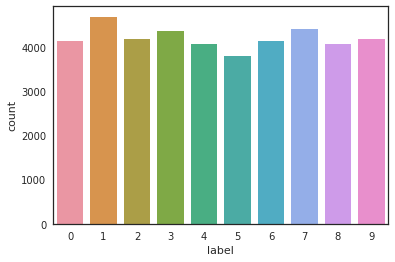

In [8]:
y_train = train['label']

X_train = train.drop(labels=['label'], axis=1)

del train
g = sns.countplot(y_train)
y_train.value_counts()

## 欠損値の確認

In [12]:
y_train.isnull().sum()

0

In [13]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [14]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

# 前処理
- 各要素の正規化
- 1次元のベクトルを2次元に変換
- ラベルをone hotベクトルにする

In [ ]:
# 0~255を0~1に正規化
X_train = X_train / 255.0
test = test / 255.0

# 1*784 -> 28*28に変換(1次元を2次元に変換)
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

# ラベルをone hotベクトルに
y_train = to_categorical(y_train, num_classes=10)

# seedを2に設定
random_seed = 2

# trainingデータを分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, )